# Import Packages

In [700]:

import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pyomo.environ import*
import math
import csv
from IPython.display import display

from pyproj import Transformer 
from itertools import combinations

# Access Files

Creating Dataframe of particular country and particular links

In [701]:
#directory = r'C:\Users\katec\OneDrive - University College Dublin\Documents\5th year\Thesis\Test Data Sets\entsoe'
filename = 'filtered_links.csv'
file_path = filename
#file_path = os.path.join(directory, filename)

df = pd.read_csv(file_path)
ireland_df = df[(df['src_country'] == 'IE') | (df['dst_country'] == 'IE')]
ireland_df.sort_values(by = 'voltage' , ascending = True, inplace = True)

# Duplicates in file of edges
#unique_ireland_df = ireland_df.drop_duplicates(subset=['src_bus_id', 'dst_bus_id'])


C:\Users\katec\AppData\Local\Temp\ipykernel_2200\2119173887.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ireland_df.sort_values(by = 'voltage' , ascending = True, inplace = True)


# Create Smaller dataframe but more meshed

Testing for nodes with more than 4 edge connections to test edges at 45 degree angles

In [702]:
#link_id_list = [9503, 9513, 9502, 9495, 9493, 9496, 9494, 9508, 9499, 9519]

link_id_list = [9499, 9519, 9496, 9494, 9508]     #, 9508

filtered_df = ireland_df[ireland_df['link_id'].isin(link_id_list)]

# Then, update the src_bus_id for the link_id 9520 in the filtered dataframe
#filtered_df.loc[filtered_df['link_id'] == 9520, 'src_bus_id'] = 6195
""" filtered_df.loc[filtered_df['link_id'] == 9493, 'dst_bus_id'] = 6187
filtered_df.loc[filtered_df['link_id'] == 9495, 'dst_bus_id'] = 6187
filtered_df.loc[filtered_df['link_id'] == 9496, 'src_bus_id'] = 6187 """

display(filtered_df)

,link_id,src_bus_id,dst_bus_id,voltage,circuits,dc,underground,under_construction,length_m,tags,src_coord,dst_coord,src_country,dst_country
5609,9519,6188,6198,220.0,1,f,f,f,48178.308519,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.624756, 53.291489)","(-6.679688, 53.703211)",IE,IE
5595,9494,6181,6188,220.0,1,f,f,f,36594.812265,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.43798799999999, 53.008173)","(-6.624756, 53.291489)",IE,IE
5597,9508,6188,6189,220.0,2,f,f,f,13963.436591,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.624756, 53.291489)","(-6.405029, 53.271783)",IE,IE
5599,9499,6188,6191,220.0,1,f,f,f,16798.312122,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.624756, 53.291489)","(-6.43798799999999, 53.389881)",IE,IE
5596,9496,6186,6188,220.0,1,f,f,f,20101.560283,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.71264599999999, 53.120405)","(-6.624756, 53.291489)",IE,IE



## Create Medium 15 node dataframe


In [703]:
""" #link_id_list = [9513, 9514, 9520, 9501, 9655, 9521, 9502, 9503, 9510, 9500, 9519, 9496, 9507, 9494, 9495]
## NOTE: src_bus id for two different links between red and green line have different number nodes
link_id_list = [9502, 9513, 9503, 9514, 9501, 9521, 9500, 9520, 9655, 9510, 9493, 9494, 9495, 9519, 9508, 9499, 9496]

filtered_df = ireland_df[ireland_df['link_id'].isin(link_id_list)]

# Then, update the src_bus_id for the link_id 9520 in the filtered dataframe
filtered_df.loc[filtered_df['link_id'] == 9520, 'src_bus_id'] = 6195
filtered_df.loc[filtered_df['link_id'] == 9493, 'dst_bus_id'] = 6187
filtered_df.loc[filtered_df['link_id'] == 9495, 'dst_bus_id'] = 6187

filtered_df.loc[filtered_df['link_id'] == 9496, 'src_bus_id'] = 6187




# To check the change, display the row with link_id 9520 from the filtered dataframe
display(filtered_df[filtered_df['link_id'] == 9520])
display(filtered_df) """

" #link_id_list = [9513, 9514, 9520, 9501, 9655, 9521, 9502, 9503, 9510, 9500, 9519, 9496, 9507, 9494, 9495]\n## NOTE: src_bus id for two different links between red and green line have different number nodes\nlink_id_list = [9502, 9513, 9503, 9514, 9501, 9521, 9500, 9520, 9655, 9510, 9493, 9494, 9495, 9519, 9508, 9499, 9496]\n\nfiltered_df = ireland_df[ireland_df['link_id'].isin(link_id_list)]\n\n# Then, update the src_bus_id for the link_id 9520 in the filtered dataframe\nfiltered_df.loc[filtered_df['link_id'] == 9520, 'src_bus_id'] = 6195\nfiltered_df.loc[filtered_df['link_id'] == 9493, 'dst_bus_id'] = 6187\nfiltered_df.loc[filtered_df['link_id'] == 9495, 'dst_bus_id'] = 6187\n\nfiltered_df.loc[filtered_df['link_id'] == 9496, 'src_bus_id'] = 6187\n\n\n\n\n# To check the change, display the row with link_id 9520 from the filtered dataframe\ndisplay(filtered_df[filtered_df['link_id'] == 9520])\ndisplay(filtered_df) "

## Modify dataframe from the csv file
Coordinates are in longitude and latitude, so equivalent cartesian xy coordinates need to be found and added to dataframe

In [704]:
# Create Transformer object to convert geographic (WGS84) (EPSG:4326) coordinates to Web Mercator (EPSG: 3857)
# Converts to cartesian xy coordinates
 
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

# Function to transform a single coordinate tuple
def transform_coord(coord):
    # Check if coord is a string (e.g., "(lon, lat)") and convert it to a tuple
    if isinstance(coord, str):
        # Remove parentheses and split by comma
        coord = coord.strip("()").split(",")
        # Convert the split strings to floats and create a tuple
        coord = tuple(map(float, coord))
    
    # At this point, coord should be a tuple of floats (lon, lat)
    # Apply the transformation using the unpacked tuple
    return transformer.transform(*coord)


filtered_df[['src_x', 'src_y']] = filtered_df['src_coord'].apply(transform_coord).apply(pd.Series)
filtered_df[['dst_x', 'dst_y']] = filtered_df['dst_coord'].apply(transform_coord).apply(pd.Series)

display(filtered_df)

C:\Users\katec\AppData\Local\Temp\ipykernel_2200\2717354479.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['src_x', 'src_y']] = filtered_df['src_coord'].apply(transform_coord).apply(pd.Series)
C:\Users\katec\AppData\Local\Temp\ipykernel_2200\2717354479.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[['src_x', 'src_y']] = filtered_df['src_coord'].apply(transform_coord).apply(pd.Series)
C:\Users\katec\AppData\Local\Temp\ipykernel_2200\2717354479.py:21: SettingWithCopyWarnin

,link_id,src_bus_id,dst_bus_id,voltage,circuits,dc,underground,under_construction,length_m,tags,src_coord,dst_coord,src_country,dst_country,src_x,src_y,dst_x,dst_y
5609,9519,6188,6198,220.0,1,f,f,f,48178.308519,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.624756, 53.291489)","(-6.679688, 53.703211)",IE,IE,-737464.464550,7.037099e+06,-743579.466818,7.114147e+06
5595,9494,6181,6188,220.0,1,f,f,f,36594.812265,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.43798799999999, 53.008173)","(-6.624756, 53.291489)",IE,IE,-716673.545893,6.984510e+06,-737464.464550,7.037099e+06
5597,9508,6188,6189,220.0,2,f,f,f,13963.436591,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.624756, 53.291489)","(-6.405029, 53.271783)",IE,IE,-737464.464550,7.037099e+06,-713004.566796,7.033430e+06
5599,9499,6188,6191,220.0,1,f,f,f,16798.312122,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.624756, 53.291489)","(-6.43798799999999, 53.389881)",IE,IE,-737464.464550,7.037099e+06,-716673.545893,7.055444e+06
5596,9496,6186,6188,220.0,1,f,f,f,20101.560283,'text_'=>' ' 'symbol'=>'220 kV Transmission L...,"(-6.71264599999999, 53.120405)","(-6.624756, 53.291489)",IE,IE,-747248.334596,7.005301e+06,-737464.464550,7.037099e+06


## Functions
Calculate Forward Sector : Calculates the sector of an edge starting at the positive x axis going in counterclockwise direction. Sectors are split from 0 - 7.

![image.png](attachment:image.png)

In [705]:


def calculate_forward_sector(src_x, src_y, dst_x, dst_y):
    dx = dst_x - src_x
    dy = dst_y - src_y
    
    print("dx dy :")
    #print(dx)
    #print(dy)
    
    # Angle in radians
    angle_rad = math.atan2(dy, dx)
    
    # Convert to degreees
    angle_deg = math.degrees(angle_rad)
    #print("Angle deg: ")
   # print(angle_deg)
    # Angle is rounded to nearest multiple of 45
    # Sector value calculated, modulo 8 used 
    sector = round(angle_deg / 45) % 8
    
    return sector

def euclidean_distance(src_x, src_y, dst_x, dst_y):
    dx = dst_x - src_x
    dy = dst_y - src_y
    
    return math.sqrt((dx)**2 + (dy)**2)


def get_non_incident_edge_pairs(G):
    non_incident_edge_pairs = []
    
    # combinations - generates all possible pairs of edges from graph G without repeating the same pair
    # '2' indicates we're looking for combinationes of 2 edges
    for edge1, edge2 in combinations(G.edges(), 2):
        
        # edges are sets and the '&' checks that they have no common elements (ie nodes)
        if not set(edge1) & set(edge2):
            non_incident_edge_pairs.append((edge1, edge2))
    return non_incident_edge_pairs       






def calculate_angle(src_x, src_y, dst_x, dst_y):
    dx = dst_x - src_x
    dy = dst_y - src_y
    angle_radians = math.atan2(dy, dx)
    angle_degrees = math.degrees(angle_radians)  # Convert the angle to degrees
    
    # Normalize the angle to be within 0 to 360 degrees
    angle_degrees = (angle_degrees + 360) % 360

    return angle_degrees


 
def get_filtered_neighbour_order(G):
    
    # Convert the directed graph to an undirected graph to consider all adjacent nodes as neighbours
    G_undirected = G.to_undirected()
    
    # Create Dictionary to story nodes neighbour orders
    neighbour_order = {}
    for node in G_undirected.nodes():
        
        # Check if the node has 2 or more neighbours
        if G_undirected.degree(node) >= 2:
        
            # Access the position of the current node
            src_pos = G_undirected.nodes[node]['pos']
            src_x, src_y = src_pos
            
            # Create list to store angle size of neighbours with src node
            angles_neighbours = []
            
            
            
            for neighbour in G_undirected.neighbors(node):
                # Access the position tuple of the neighbour node using the 'pos' attribute
                dst_pos = G_undirected.nodes[neighbour]['pos']
                dst_x, dst_y = dst_pos
                
                # Calculate the angle from the source node to the neighbour node
                angle = calculate_angle(src_x, src_y, dst_x, dst_y)
                
                # Append the angle and neighbour to the list
                angles_neighbours.append((angle, neighbour)) 
                
                """ ## TESTING USING ADJUSTED ANGLES
                angle = calculate_angle(src_x, src_y, dst_x, dst_y)
                if (360 - angle)  """
            
            # Sort the list of (angle, neighbour) pairs by angle in ascending order
            angles_neighbours.sort()
            
            # Extract the sorted neighbours from the sorted list of pairs
            sorted_neighbours = [neighbour for _, neighbour in angles_neighbours]
            
            # Check conditions to move the last neighbour to the first position
            if angles_neighbours[-1][0] > 315 and ((360 - angles_neighbours[-1][0]) < angles_neighbours[0][0]):
                # Move the last neighbour to the first position
                sorted_neighbours.insert(0, sorted_neighbours.pop())
            
            
            # Store the sorted list of neighbours in the dictionary with the src_node as the key
            neighbour_order[node] = sorted_neighbours
    
    return neighbour_order
   
     
""" def get_filtered_neighbour_order(G):
    G_undirected = G.to_undirected()
    neighbour_order = {}

    for node in G_undirected.nodes():
        if G_undirected.degree(node) >= 2:
            src_pos = G_undirected.nodes[node]['pos']  # Access positions from the undirected graph
            src_x, src_y = src_pos

            angles_neighbours = []
            for neighbour in G_undirected.neighbors(node):
                dst_pos = G_undirected.nodes[neighbour]['pos']
                dst_x, dst_y = dst_pos
                angle = calculate_angle(src_x, src_y, dst_x, dst_y)
                
                # Debugging print statements
                print(f"Node: {node}, Neighbour: {neighbour}, Angle: {angle} degress")

                angles_neighbours.append((angle, neighbour))

            angles_neighbours.sort()
            sorted_neighbours = [neighbour for _, neighbour in angles_neighbours]
            neighbour_order[node] = sorted_neighbours

    return neighbour_order """


' def get_filtered_neighbour_order(G):\n    G_undirected = G.to_undirected()\n    neighbour_order = {}\n\n    for node in G_undirected.nodes():\n        if G_undirected.degree(node) >= 2:\n            src_pos = G_undirected.nodes[node][\'pos\']  # Access positions from the undirected graph\n            src_x, src_y = src_pos\n\n            angles_neighbours = []\n            for neighbour in G_undirected.neighbors(node):\n                dst_pos = G_undirected.nodes[neighbour][\'pos\']\n                dst_x, dst_y = dst_pos\n                angle = calculate_angle(src_x, src_y, dst_x, dst_y)\n                \n                # Debugging print statements\n                print(f"Node: {node}, Neighbour: {neighbour}, Angle: {angle} degress")\n\n                angles_neighbours.append((angle, neighbour))\n\n            angles_neighbours.sort()\n            sorted_neighbours = [neighbour for _, neighbour in angles_neighbours]\n            neighbour_order[node] = sorted_neighbours\n\n   

# NetworkX Implementation
Dataframe is accessed where nodes and edges are added to graph. 
Forward and backward sector of a particular edge are found and stored as attributes along with the voltage information.

In [706]:

# Initialize a directed graph since we have source and destination
G = nx.DiGraph()

# Loop through the DataFrame rows to add edges and nodes to the graph
for index, row in filtered_df.iterrows():
    src_node = row['src_bus_id']
    dst_node = row['dst_bus_id']
    voltage = row['voltage']
    
    # Add the source and destination nodes if they don't already exist
    if src_node not in G:
        G.add_node(src_node, pos=(row['src_x'], row['src_y']))
    if dst_node not in G:
        G.add_node(dst_node, pos=(row['dst_x'], row['dst_y']))
        
        
        
    # Calculate the forward sector for edges
    forward_sector = calculate_forward_sector(row['src_x'], row['src_y'], row['dst_x'], row['dst_y'])

    # Backward sector
    backward_sector = (forward_sector + 4) % 8
    
    distance = euclidean_distance(row['src_x'], row['src_y'], row['dst_x'], row['dst_y'])
    
    # Add an edge between the source and destination nodes, voltage is attribute
    G.add_edge(src_node, dst_node, 
               voltage = voltage, 
               forward_sector = forward_sector, 
               backward_sector = backward_sector,
               distance = distance
               )


# Create list of non-incident edge pairs
non_incident_edge_pairs = get_non_incident_edge_pairs(G)

print(non_incident_edge_pairs)

# Find non-incident edges
#non_incident_edge_pairs = get_non_incident_edge_pairs(G)

# Print non-incident edge pairs
print("Non-incident edge pairs:")
for edge_pair in non_incident_edge_pairs:
    print(edge_pair)
    
ordered_neighbours_dict = get_filtered_neighbour_order(G)
print("\nNodes with more than 2 neighbours ordered:")
print(ordered_neighbours_dict)
for node, neighbours in ordered_neighbours_dict.items():
    print(len(neighbours))
 

dx dy :
dx dy :
dx dy :
dx dy :
dx dy :
[]
Non-incident edge pairs:

Nodes with more than 2 neighbours ordered:
{6188: [6189, 6191, 6198, 6186, 6181]}
5


## Drawing NetworkX Graph

C:\Users\katec\AppData\Local\Temp\ipykernel_2200\838404640.py:18: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, width = 3)


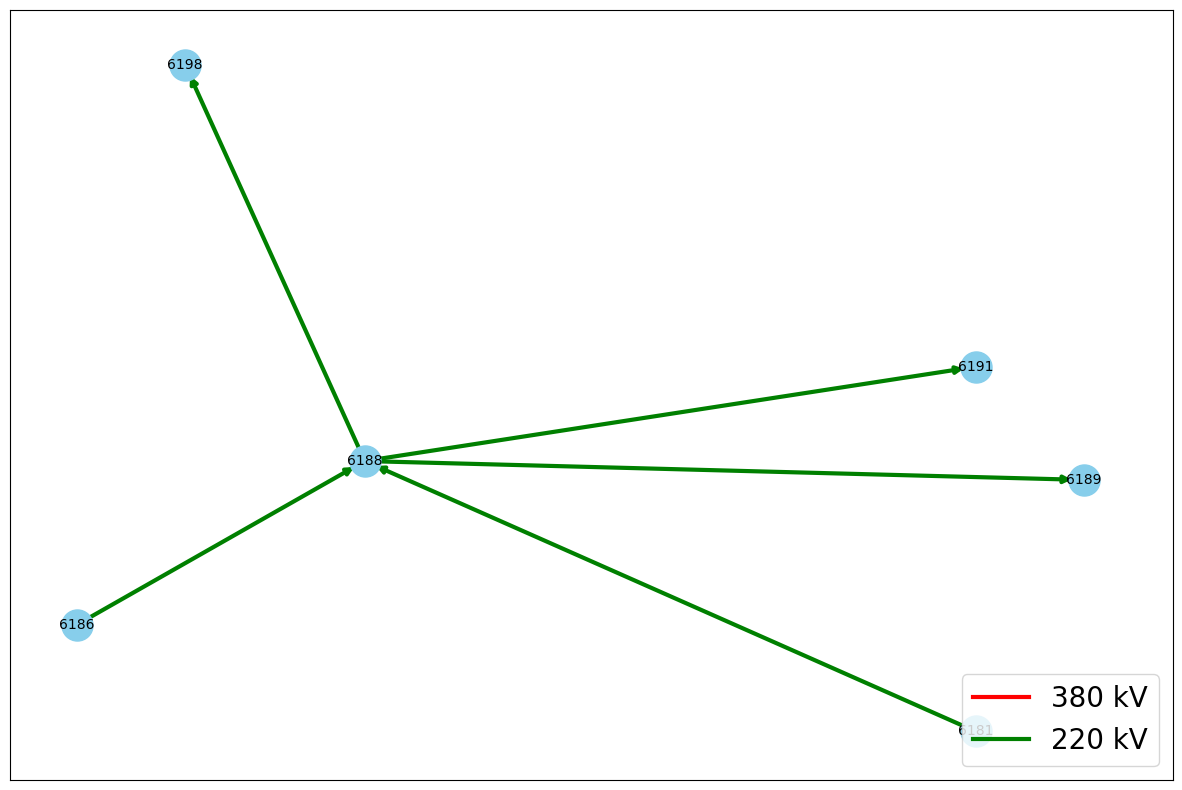

In [707]:
import matplotlib.lines as mlines

pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize = (15, 10))
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)

# Create custom lines for the legend
red_line = mlines.Line2D([], [], color='red', markersize=30, label='380 kV', linewidth = 3)
green_line = mlines.Line2D([], [], color='green', markersize=30, label='220 kV', linewidth = 3)



# Draw the graph edges with different colors based on the voltage
for (u, v, d) in G.edges(data=True):
    edge_color = 'r' if d['voltage'] == 380.0 else 'g' if d['voltage'] == 220.0 else 'k'
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, width = 3)

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Create edge labels for voltages
edge_labels = nx.get_edge_attributes(G, 'link_id')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=7)
#nx.draw_networkx_edge_labels(G, pos, label_pos=0.5, font_size=7)


# Add the legend to the plot
plt.legend(handles=[red_line, green_line], loc='lower right', fontsize = 20)


# Show the plot
plt.show()

## Create Dictionary to access edge information

In [708]:
def get_edge_info(G, edge):
    node1, node2 = edge
    
    # edge attributes eg voltage forward/backward sector are stored in edge data
    edge_data = G.get_edge_data(node1, node2)
    
    # Additional edge information
    edge_information = {
        'edge': edge,
        'source': node1,
        'destination': node2,
        'source_position': G.nodes[node1].get('pos'),
        'destination_position': G.nodes[node2].get('pos'),
        'source_neighbors': list(G.successors(node1)),  # or list(G.successors(u)) for DiGraph
        'destination_neighbors': list(G.predecessors(node2)),  # or list(G.predecessors(v)) for DiGraph
        'source_degree': G.degree(node1),
        'destination_degree': G.degree(node2)
    }
    
    # Merge edge_data into edge_info
    edge_information.update(edge_data)
    return edge_information

    
    
# Usage example
edge_details = {}
for edge in G.edges():
    edge_details[edge] = get_edge_info(G, edge)
    print(edge_details[edge])
    
    forward = edge_details[edge].get('forward_sector')
    backward = edge_details[edge].get('backward_sector')
    print(f"Forward sector for edge {edge}: {forward}")
    print(f"Backward sector for edge {edge}: {backward}\n") 

{'edge': (6188, 6198), 'source': 6188, 'destination': 6198, 'source_position': (-737464.4645496837, 7037098.559885431), 'destination_position': (-743579.4668179399, 7114147.184426849), 'source_neighbors': [6198, 6189, 6191], 'destination_neighbors': [6188], 'source_degree': 5, 'destination_degree': 1, 'voltage': 220.0, 'forward_sector': 2, 'backward_sector': 6, 'distance': 77290.9037110133}
Forward sector for edge (6188, 6198): 2
Backward sector for edge (6188, 6198): 6

{'edge': (6188, 6189), 'source': 6188, 'destination': 6189, 'source_position': (-737464.4645496837, 7037098.559885431), 'destination_position': (-713004.5667961502, 7033429.505480125), 'source_neighbors': [6198, 6189, 6191], 'destination_neighbors': [6188], 'source_degree': 5, 'destination_degree': 1, 'voltage': 220.0, 'forward_sector': 0, 'backward_sector': 4, 'distance': 24733.551268315976}
Forward sector for edge (6188, 6189): 0
Backward sector for edge (6188, 6189): 4

{'edge': (6188, 6191), 'source': 6188, 'destin

In [709]:
# Debugging to check the sectors around the node 6188

# Usage example
edge_details = {}
for edge in G.edges():
    # Check if the node 6188 is part of the edge
    if 6188 in edge:
        edge_details[edge] = get_edge_info(G, edge)
        print(edge_details[edge])
        
        forward = edge_details[edge].get('forward_sector')
        backward = edge_details[edge].get('backward_sector')
        print(f"Forward sector for edge {edge}: {forward}")
        print(f"Backward sector for edge {edge}: {backward}\n") 


{'edge': (6188, 6198), 'source': 6188, 'destination': 6198, 'source_position': (-737464.4645496837, 7037098.559885431), 'destination_position': (-743579.4668179399, 7114147.184426849), 'source_neighbors': [6198, 6189, 6191], 'destination_neighbors': [6188], 'source_degree': 5, 'destination_degree': 1, 'voltage': 220.0, 'forward_sector': 2, 'backward_sector': 6, 'distance': 77290.9037110133}
Forward sector for edge (6188, 6198): 2
Backward sector for edge (6188, 6198): 6

{'edge': (6188, 6189), 'source': 6188, 'destination': 6189, 'source_position': (-737464.4645496837, 7037098.559885431), 'destination_position': (-713004.5667961502, 7033429.505480125), 'source_neighbors': [6198, 6189, 6191], 'destination_neighbors': [6188], 'source_degree': 5, 'destination_degree': 1, 'voltage': 220.0, 'forward_sector': 0, 'backward_sector': 4, 'distance': 24733.551268315976}
Forward sector for edge (6188, 6189): 0
Backward sector for edge (6188, 6189): 4

{'edge': (6188, 6191), 'source': 6188, 'destin

In [710]:
## Function to get index of nodes in the ordered neighbours list.

# This function initializes the set of (node, index) pairs, where 'node' is a node with 2 or more neighbors,
# and 'index' is a unique integer (starting from 1) representing the position of a neighbor in the
# counterclockwise ordering of neighbors around 'node'.

def node_neighbour_index_pairs_init(model):
    node_index_pairs = []
    for node, neighbors in ordered_neighbours_dict.items():
        # Start index from 0 for each node's neighbors
        for idx in range(0, len(neighbors)):
            node_index_pairs.append((node, idx))
    return node_index_pairs

In [711]:
# to get dynamic min length 
# Minimum length percentage
min_length_percentage = 0.05  # Adjust as needed

# Dictionary to store dynamic minimum lengths for each edge
dynamic_min_lengths = {}

for edge in G.edges():
    edge_info = get_edge_info(G, edge)
    
    forward = edge_info.get('forward_sector')
    backward = edge_info.get('backward_sector')
    
    if forward in (1, 3, 5, 7) or backward in (1, 3, 5, 7):
        dynamic_min_length = edge_info['distance'] *0.08
    else:
        # Assuming 'distance' is an attribute in edge_info; if not, calculate it from positions
        dynamic_min_length = edge_info['distance'] * min_length_percentage
    
    # Store the calculated dynamic minimum length in the dictionary
    dynamic_min_lengths[edge] = dynamic_min_length
    
print(dynamic_min_lengths)


# before implementing adjusted percentage lengths:
# 
# 
# {(6188, 6198): 3864.5451855506653, 
# (6188, 6189): 1236.6775634157989, 
# (6188, 6191): 1386.3615306969805,  sector 1
# (6181, 6188): 2827.4701548371004, 
# (6186, 6188): 1663.4504829594662}

{(6188, 6198): 3864.5451855506653, (6188, 6189): 1236.6775634157989, (6188, 6191): 2218.1784491151684, (6181, 6188): 2827.4701548371004, (6186, 6188): 1663.4504829594662}


# Optimisation

In [712]:
model = ConcreteModel()



print(list(G.nodes()))
print(list(G.edges()))
# Set used to index the other components eg Param and Var, and to define the scope
model.Nodes = Set(initialize = list(G.nodes()))
model.Edges = Set(initialize = list(G.edges()))

# Initialize set of non-incident edge pairs
# dimen = 4: creates a collection of edge pairs where each pair is treated as a single tuple, 2 integers per edge
model.NonIncidentEdges = Set(initialize = non_incident_edge_pairs, dimen=4)


# Set with 2 or more neighbours
# Storing set nodes with 2 or more neighbours that were predetermined in the dictionary
model.NodesWith2Neighbours = Set(initialize = ordered_neighbours_dict.keys())


# Initialize the set with the function that provides the (node, index) pairs
model.NodeNeighbours2IndexPairs = Set(dimen=2, initialize=node_neighbour_index_pairs_init)





### PARAM ###
## Param - fixed value in model that doesn't change during optimisation process ##
# pos defined earlier as tuple (x, y) in graph G
model.x_init = Param(model.Nodes, initialize={node: pos[node][0] for node in G.nodes()})
model.y_init = Param(model.Nodes, initialize={node: pos[node][1] for node in G.nodes()})


# Access information from dictionary of the edge info
edge_info = {edge: get_edge_info(G, edge) for edge in G.edges()}

# Initialize Params for static attributes from the edges
model.voltage = Param(model.Edges, initialize={edge: edge_info[edge]['voltage'] for edge in model.Edges})
model.sect_forward = Param(model.Edges, initialize={edge: edge_info[edge]['forward_sector'] for edge in model.Edges})
model.sect_backward = Param(model.Edges, initialize={edge: edge_info[edge]['backward_sector'] for edge in model.Edges})
model.distance = Param(model.Edges, initialize={edge: edge_info[edge]['distance'] for edge in model.Edges} )
#model.non_incident_edges = Param(model.Edges, initialize = {edge: edge_info[edge]['non_incident_edges'] for edge in model.Edges} )


# Param to store the ordered neighbors for each node in the model
model.OrderedNeighbours = Param(
    model.NodesWith2Neighbours,  # Index set for the Param, representing nodes with 2 or more neighbors
    within=Any,  # Specifies that the Param can hold any type of data, in this case, tuples of nodes
    initialize=lambda model, node: tuple(ordered_neighbours_dict[node])  # Initialization function
    # lambda function takes 2 arguments model and node (element from set Nodewith2Neigbours)
    # for each node, it gets the list or ordered neighbours from the dictionary
    # list is converted to tuple so that for Param, the contents are unchangeable
)
   





### VARIABLES ###
## Define Variables ##
model.x_pos = Var(model.Nodes, within = Reals, initialize = model.x_init)
model.y_pos = Var(model.Nodes, within = Reals, initialize = model.y_init)

model.z1_pos = Expression(model.Nodes, rule = lambda model, node: model.x_pos[node] + model.y_pos[node])
model.z2_pos = Expression(model.Nodes, rule = lambda model, node: model.x_pos[node] - model.y_pos[node])


model.dir_forward = Var(model.Edges, within = Integers, bounds = (0, 7))
model.dir_backward = Var(model.Edges, within = Integers, bounds = (0, 7))


# Binary variable for octilinear constraint to determine where edge is drawn
model.alpha_pred = Var(model.Edges, within = Binary, bounds = (0, 1))
model.alpha_orig = Var(model.Edges, within = Binary, bounds = (0, 1))
model.alpha_succ = Var(model.Edges, within = Binary, bounds = (0, 1))


# Binary Variable for non-incident edge constraint
model.is_N = Var(model.NonIncidentEdges, within=Binary)
model.is_S = Var(model.NonIncidentEdges, within=Binary)
model.is_E = Var(model.NonIncidentEdges, within=Binary)
model.is_W = Var(model.NonIncidentEdges, within=Binary)
model.is_NE = Var(model.NonIncidentEdges, within=Binary)
model.is_NW = Var(model.NonIncidentEdges, within=Binary)
model.is_SE = Var(model.NonIncidentEdges, within=Binary)
model.is_SW = Var(model.NonIncidentEdges, within=Binary)

model.delta_pred = Var(model.Edges, within = Integers, bounds = (0, 7))
model.delta_orig = Var(model.Edges, within = Integers, bounds = (0, 7))
model.delta_succ = Var(model.Edges, within = Integers, bounds = (0, 7))


max_degree = max(len(neighbors) for neighbors in ordered_neighbours_dict.values())


# Define Beta as a binary variable indexed by the (node, index) pairs
# Beta[node, idx] will be used in the constraints to identify the "wrap-around" point
# in the counterclockwise ordering of neighbors around each node
model.Beta = Var(model.NodeNeighbours2IndexPairs, within=Binary)




# Redefine rpos as a continuous variable representing the deviation magnitude
model.rpos = Var(model.Edges, within=NonNegativeReals)





#model.rpos = Var(model.Edges, within=Binary)


[6188, 6198, 6181, 6189, 6191, 6186]
[(6188, 6198), (6188, 6189), (6188, 6191), (6181, 6188), (6186, 6188)]


### Debugging

In [713]:
## DEBUGGING
for pair in model.NodeNeighbours2IndexPairs:
    print(pair)


for node in model.NodesWith2Neighbours:
    print(f"Node: {node}, Ordered Neighbours: {model.OrderedNeighbours[node]}")
    print(len(model.OrderedNeighbours[node]) - 1)

for node, index in model.NodeNeighbours2IndexPairs:
    print(f"Beta[{node}, {index}]: {model.Beta[node, index]}")
    
print(len(model.OrderedNeighbours[node]) - 1)

(6188, 0)
(6188, 1)
(6188, 2)
(6188, 3)
(6188, 4)
Node: 6188, Ordered Neighbours: (6189, 6191, 6198, 6186, 6181)
4
Beta[6188, 0]: Beta[6188,0]
Beta[6188, 1]: Beta[6188,1]
Beta[6188, 2]: Beta[6188,2]
Beta[6188, 3]: Beta[6188,3]
Beta[6188, 4]: Beta[6188,4]
4


# Octilinearity Constraint

In [714]:
M= 10000

# Sum of Binary variables is equal to 1
# node1 and node2 are the src and dst nodes defined in model.Edges
def alpha_direction_constraint(model, node1, node2):
    return model.alpha_pred[node1, node2] + model.alpha_orig[node1, node2] + model.alpha_succ[node1, node2] == 1
model.alpha_direction_constraint = Constraint(model.Edges, rule = alpha_direction_constraint)


 
 # for each edge in tuple (node1, node2) in model.Edges, dir constraint is called and formed
def dir_forward_constraint(model, node1, node2):
    
    
    sect_forward_pred = (model.sect_forward[node1, node2] - 1) % 8
    sect_forward_orig = model.sect_forward[node1, node2]
    sect_forward_succ = (model.sect_forward[node1, node2] + 1) % 8
    
     # Debugging: Print the values of sectors and binary variables
    print(f"Edge: {(node1, node2)}")
    print(f"sect_forward_pred: {sect_forward_pred}, sect_forward_orig: {sect_forward_orig}, sect_forward_succ: {sect_forward_succ}")
    print(f"alpha_pred[{node1}, {node2}]: {model.alpha_pred[node1, node2].value}")
    print(f"alpha_orig[{node1}, {node2}]: {model.alpha_orig[node1, node2].value}")
    print(f"alpha_succ[{node1}, {node2}]: {model.alpha_succ[node1, node2].value}")
    
    
    
    return model.dir_forward[node1, node2] == ((sect_forward_pred * model.alpha_pred[node1, node2]) +
                                        (sect_forward_orig * model.alpha_orig[node1, node2]) +
                                        (sect_forward_succ * model.alpha_succ[node1, node2])
                                        )

model.DirForwardConstraint = Constraint(model.Edges, rule=dir_forward_constraint)
 

def dir_backward_constraint(model, node1, node2):
    sect_backward_pred = (model.sect_backward[node1, node2] - 1) % 8
    sect_backward_orig = model.sect_backward[node1, node2]
    sect_backward_succ = (model.sect_backward[node1, node2] + 1) % 8
    
      # Debugging: Print the values of sectors and binary variables
    print(f"Edge: {(node1, node2)}")
    print(f"sect_backward_pred: {sect_backward_pred}, sect_backward_orig: {sect_backward_orig}, sect_backward_succ: {sect_backward_succ}")
    print(f"alpha_pred[{node1}, {node2}]: {model.alpha_pred[node1, node2].value}")
    print(f"alpha_orig[{node1}, {node2}]: {model.alpha_orig[node1, node2].value}")
    print(f"alpha_succ[{node1}, {node2}]: {model.alpha_succ[node1, node2].value}") 
    
    return model.dir_backward[node1, node2] == ((sect_backward_pred * model.alpha_pred[node1, node2]) +
                                        (sect_backward_orig * model.alpha_orig[node1, node2]) +
                                        (sect_backward_succ * model.alpha_succ[node1, node2])
                                        )
    
model.DirBackwardConstraint = Constraint(model.Edges, rule = dir_backward_constraint) 




 
def sector_constraints_rule(model, node1, node2):

    # Retrieve original sector and minimum edge length
    sect_orig = model.sect_forward[node1, node2]
    min_length = dynamic_min_lengths[(node1, node2)] #(model.distance[node1, node2])*0.1  #1000

    # Define a large constant M for making constraints trivial when not active
    M = 10000  # Adjust as needed

    # Iterate over each alpha variable and its corresponding sector adjustment
    for alpha, adjustment in zip([model.alpha_pred, model.alpha_orig, model.alpha_succ], [-1, 0, 1]):
        # Adjusted sector based on alpha variable
        sect_adjusted = (sect_orig + adjustment) % 8

        # Conditions based on adjusted sector
        if sect_adjusted in [0, 4]:  # Horizontal
            model.sector_constraints.add(model.y_pos[node1] - model.y_pos[node2] <= M * (1 - alpha[node1, node2]))
            model.sector_constraints.add(-model.y_pos[node1] + model.y_pos[node2] <= M * (1 - alpha[node1, node2]))
            
            if sect_adjusted == 0:
                # For sector 0, node1 should be to the left of node2 by at least min_length if this direction is selected
                model.sector_constraints.add(model.x_pos[node2] - model.x_pos[node1] >= min_length - M * (1 - alpha[node1, node2]))
            elif sect_adjusted == 4:
                # For sector 4, node1 should be to the right of node2 by at least min_length if this direction is selected
                model.sector_constraints.add(model.x_pos[node1] - model.x_pos[node2] >= min_length - M * (1 - alpha[node1, node2]))
                
        
        elif sect_adjusted in [2, 6]:  # Vertical
            # Add corresponding constraints for this sector
            model.sector_constraints.add(model.x_pos[node1] - model.x_pos[node2] <= M*(1 - alpha[node1, node2]))
            model.sector_constraints.add(-model.x_pos[node1] + model.x_pos[node2] <= M*(1 - alpha[node1, node2]))
            if sect_adjusted == 2:  # Upwards
                # Node2's y_pos should be at least min_length above Node1's y_pos
                model.sector_constraints.add(model.y_pos[node2] - model.y_pos[node1] >= min_length - M * (1 - alpha[node1, node2]))
            elif sect_adjusted == 6:  # Downwards
                # Node2's y_pos should be at least min_length below Node1's y_pos
                model.sector_constraints.add(model.y_pos[node1] - model.y_pos[node2] >= min_length - M * (1 - alpha[node1, node2]))






        elif sect_adjusted == 1:         #upright diagonal /
            # dx = dy
            model.sector_constraints.add((model.x_pos[node2] - model.x_pos[node1]) - (model.y_pos[node2] - model.y_pos[node1]) <= M*(1 - alpha[node1, node2]))
            model.sector_constraints.add((model.y_pos[node2] - model.y_pos[node1]) - (model.x_pos[node2] - model.x_pos[node1]) <= M*(1 - alpha[node1, node2]))
            # dx + dy >= min length of diagonal
            model.sector_constraints.add((model.x_pos[node2] - model.x_pos[node1]) + (model.y_pos[node2] - model.y_pos[node1]) >= min_length - M*(1 - alpha[node1, node2]))
            
        elif sect_adjusted == 5:        # Diagonal downwards /
            # dx = -dy
            model.sector_constraints.add((model.x_pos[node2] - model.x_pos[node1]) + (model.y_pos[node2] - model.y_pos[node1]) <= M*(1 - alpha[node1, node2]))
            model.sector_constraints.add(-(model.x_pos[node2] - model.x_pos[node1]) - (model.y_pos[node2] - model.y_pos[node1]) <= M*(1 - alpha[node1, node2]))
            # -dx - dy >= min length
            # negative diagonal
            model.sector_constraints.add(-(model.x_pos[node2] - model.x_pos[node1]) - (model.y_pos[node2] - model.y_pos[node1]) >= min_length - M*(1 - alpha[node1, node2]))

            


            
        ## Diagonal \
            
        elif sect_adjusted == 3:    # Up left diagonal \
            # -dx = dy
            model.sector_constraints.add(-(model.x_pos[node2] - model.x_pos[node1]) - (model.y_pos[node2] - model.y_pos[node1]) <= M * (1 - alpha[node1, node2]))
            
            # Ensure dx is negative
            model.sector_constraints.add((model.x_pos[node2] - model.x_pos[node1]) <= 0)
            
            # -dx + dy >= min length (dx is negative value)
            model.sector_constraints.add(-(model.x_pos[node2] - model.x_pos[node1]) + (model.y_pos[node2] - model.y_pos[node1]) >= min_length - M * (1 - alpha[node1, node2]))
            
            
            
        elif sect_adjusted == 7:    # Down right Diagonal \
            # dx = -dy
            model.sector_constraints.add((model.x_pos[node2] - model.x_pos[node1]) + (model.y_pos[node2] - model.y_pos[node1]) <= M * (1 - alpha[node1, node2]))
            
            # Ensure dy is negative
            model.sector_constraints.add((model.y_pos[node2] - model.y_pos[node1]) <= 0)
        
            # dx - dy >= min length (since dy is negative, we use -dy)
            model.sector_constraints.add((model.x_pos[node2] - model.x_pos[node1]) - (model.y_pos[node2] - model.y_pos[node1]) >= min_length - M * (1 - alpha[node1, node2]))
   




       



       
            # Fill in your constraints similar to above
    return Constraint.Skip 

# Initialize the constraint list on your model if not already done
model.sector_constraints = ConstraintList()

# Apply the rule to each edge
model.SectorConstraint = Constraint(model.Edges, rule=sector_constraints_rule)

 
 

 

   


Edge: (6188, 6198)
sect_forward_pred: 1, sect_forward_orig: 2, sect_forward_succ: 3
alpha_pred[6188, 6198]: None
alpha_orig[6188, 6198]: None
alpha_succ[6188, 6198]: None
Edge: (6188, 6189)
sect_forward_pred: 7, sect_forward_orig: 0, sect_forward_succ: 1
alpha_pred[6188, 6189]: None
alpha_orig[6188, 6189]: None
alpha_succ[6188, 6189]: None
Edge: (6188, 6191)
sect_forward_pred: 0, sect_forward_orig: 1, sect_forward_succ: 2
alpha_pred[6188, 6191]: None
alpha_orig[6188, 6191]: None
alpha_succ[6188, 6191]: None
Edge: (6181, 6188)
sect_forward_pred: 1, sect_forward_orig: 2, sect_forward_succ: 3
alpha_pred[6181, 6188]: None
alpha_orig[6181, 6188]: None
alpha_succ[6181, 6188]: None
Edge: (6186, 6188)
sect_forward_pred: 1, sect_forward_orig: 2, sect_forward_succ: 3
alpha_pred[6186, 6188]: None
alpha_orig[6186, 6188]: None
alpha_succ[6186, 6188]: None
Edge: (6188, 6198)
sect_backward_pred: 5, sect_backward_orig: 6, sect_backward_succ: 7
alpha_pred[6188, 6198]: None
alpha_orig[6188, 6198]: None


## Circular Vertex Order
The initial circular ordering of neighbour nodes (counterclockwise) should be the same after optimisation.

For each node in the map, the sequence in which the neighbouring nodes are arranged around a particular node should match the order in which the neighbouring nodes are arranged in the final layout.

In [715]:
## Helper Function for the circular vertex order
## Determines if node with more than 2 neighbours is the source or destination node
## So the correct direction can be assigned to it

def directional_sector(model, node, neighbor):
    if (node, neighbor) in model.Edges:
        return model.dir_forward[node, neighbor]
    elif (neighbor, node) in model.Edges:
        return model.dir_backward[neighbor, node]
    else:
        return None  # This case should ideally never happen if the graph is well-defined

In [716]:
# Beta Binary Sum Constraint


def beta_sum_constraint_rule(model, node):
    # Ensure we use 0-based indexing to match the updated indexing in Beta
    # Note that RangeSet in Pyomo starts from 1, so we adjust the range accordingly
    return sum(model.Beta[node, index] for index in range(0, len(model.OrderedNeighbours[node]) )) == 1

model.BetaSumConstraint = Constraint(model.NodesWith2Neighbours, rule=beta_sum_constraint_rule)




# Define the ConstraintList in your Pyomo model
model.OrderMaintenanceConstraints = ConstraintList()


def add_order_maintenance_constraints(model):
    for node, neighbours in ordered_neighbours_dict.items():
        num_neighbours = len(neighbours)
        
        
        for index in range(num_neighbours):
            print(index)
            # Handle all neighbor pairs except the last pair (which wraps around)
            if index < num_neighbours - 1:
                next_index = index + 1
            else:
                next_index = 0      # wrap around case
                
                
            # Use the helper function to dynamically select dir_forward or dir_backward
            dir_sect = directional_sector(model, node, neighbours[index])
            next_dir_sect = directional_sector(model, node, neighbours[next_index])
            
            # Debugging prints before adding the constraint
            print(f"Node: {node}, Neighbour: {neighbours[index]}, Directional Sector: {dir_sect}")
            print(f"Node: {node}, Next Neighbour: {neighbours[next_index]}, Next Directional Sector: {next_dir_sect}")
            if index == num_neighbours - 1:  # For wrap-around case
                print(f"\nNode: {node}, Index: {index}, Beta: {model.Beta[node, index].value if model.Beta[node, index].value is not None else 'Not solved yet'}")

            
            
            if dir_sect is not None and next_dir_sect is not None:
                    model.OrderMaintenanceConstraints.add(dir_sect <= next_dir_sect - 1 + 8*model.Beta[node, index])

                

            
           
# Call the function to add the constraints to the ConstraintList
add_order_maintenance_constraints(model) 


0
Node: 6188, Neighbour: 6189, Directional Sector: dir_forward[6188,6189]
Node: 6188, Next Neighbour: 6191, Next Directional Sector: dir_forward[6188,6191]
1
Node: 6188, Neighbour: 6191, Directional Sector: dir_forward[6188,6191]
Node: 6188, Next Neighbour: 6198, Next Directional Sector: dir_forward[6188,6198]
2
Node: 6188, Neighbour: 6198, Directional Sector: dir_forward[6188,6198]
Node: 6188, Next Neighbour: 6186, Next Directional Sector: dir_backward[6186,6188]
3
Node: 6188, Neighbour: 6186, Directional Sector: dir_backward[6186,6188]
Node: 6188, Next Neighbour: 6181, Next Directional Sector: dir_backward[6181,6188]
4
Node: 6188, Neighbour: 6181, Directional Sector: dir_backward[6181,6188]
Node: 6188, Next Neighbour: 6189, Next Directional Sector: dir_forward[6188,6189]

Node: 6188, Index: 4, Beta: Not solved yet


## Edge Spacing 
Each edge must have a distance of at least dmin > 0 from each non incident edge.

- Prevents edge crossings
- maintains planarity (edges have minimum separation in at least 1 octilinear direction)
- enhances visualisation
- preserves topology structure

In [717]:
def non_incident_edge_direction_constraint_rule(model, u1, v1, u2, v2):
    
    e1 = (u1, v1)
    e2 = (u2, v2)
        
    return (model.is_N[e1, e2] + model.is_S[e1, e2] + model.is_E[e1, e2] + model.is_W[e1, e2] +
            model.is_NE[e1, e2] + model.is_NW[e1, e2] + model.is_SE[e1, e2] + model.is_SW[e1, e2] >= 1)
    
model.NonIncidentEdgeDirectionConstraint = Constraint(model.NonIncidentEdges, rule=non_incident_edge_direction_constraint_rule)

# Initialize ConstraintList outside of function
# Adds new constraints to list in model without reinitializing it
model.edgeSpacingConstraints = ConstraintList()

def edge_spacing_constraint(model, u1, v1, u2, v2):
    dmin = 100
    M = 10000
    
    
    e1 = (u1, v1)
    e2 = (u2, v2)
    
    # is_N[e1, e2] means that e1 is north of e1
    
    ## North Constraint
    c1 = model.y_pos[u2] - model.y_pos[u1] <= M * (1 - model.is_N[e1, e2]) - dmin
    c2 = model.y_pos[v2] - model.y_pos[u1] <= M * (1 - model.is_N[e1, e2]) - dmin
    c3 = model.y_pos[u2] - model.y_pos[v1] <= M * (1 - model.is_N[e1, e2]) - dmin
    c4 = model.y_pos[v2] - model.y_pos[v1] <= M * (1 - model.is_N[e1, e2]) - dmin

    
    # South
    c5 = model.y_pos[u1] - model.y_pos[u2] <= M * (1 - model.is_S[e1, e2]) - dmin
    c6 = model.y_pos[v1] - model.y_pos[u2] <= M * (1 - model.is_S[e1, e2]) - dmin
    c7 = model.y_pos[u1] - model.y_pos[v2] <= M * (1 - model.is_S[e1, e2]) - dmin
    c8 = model.y_pos[v1] - model.y_pos[v2] <= M * (1 - model.is_S[e1, e2]) - dmin

    
    # is_E[e1, e2] = 1 means that e1 is East of e2
    ## East
    c9 = model.x_pos[u2] - model.x_pos[u1] <= M * (1 - model.is_E[e1, e2]) - dmin
    c10 = model.x_pos[v2] - model.x_pos[u1] <= M * (1 - model.is_E[e1, e2]) - dmin
    c11 = model.x_pos[u2] - model.x_pos[v1] <= M * (1 - model.is_E[e1, e2]) - dmin
    c12 = model.x_pos[v2] - model.x_pos[v1] <= M * (1 - model.is_E[e1, e2]) - dmin

    
    
    
    ## West
    c13 = model.x_pos[u1] - model.x_pos[u2] <= M * (1 - model.is_W[e1, e2]) - dmin
    c14 = model.x_pos[v1] - model.x_pos[u2] <= M * (1 - model.is_W[e1, e2]) - dmin
    c15 = model.x_pos[u1] - model.x_pos[v2] <= M * (1 - model.is_W[e1, e2]) - dmin
    c16 = model.x_pos[v1] - model.x_pos[v2] <= M * (1 - model.is_W[e1, e2]) - dmin

    
    
    ## NE
    c17 = model.z1_pos[u2] - model.z1_pos[u1] <= M * (1 - model.is_NE[e1, e2]) - dmin
    c18 = model.z1_pos[v2] - model.z1_pos[u1] <= M * (1 - model.is_NE[e1, e2]) - dmin
    c19 = model.z1_pos[u2] - model.z1_pos[v1] <= M * (1 - model.is_NE[e1, e2]) - dmin
    c20 = model.z1_pos[v2] - model.z1_pos[v1] <= M * (1 - model.is_NE[e1, e2]) - dmin

    
    
    ## NW
    c21 = model.z2_pos[u1] - model.z2_pos[u2] <= M * (1 - model.is_NW[e1, e2]) - dmin
    c22 = model.z2_pos[u1] - model.z2_pos[v2] <= M * (1 - model.is_NW[e1, e2]) - dmin
    c23 = model.z2_pos[v1] - model.z2_pos[u2] <= M * (1 - model.is_NW[e1, e2]) - dmin
    c24 = model.z2_pos[v1] - model.z2_pos[v2] <= M * (1 - model.is_NW[e1, e2]) - dmin

    
    
    # SE
    c25 = model.z2_pos[u2] - model.z2_pos[u1] <= M * (1 - model.is_SE[e1, e2]) - dmin
    c26 = model.z2_pos[v2] - model.z2_pos[u1] <= M * (1 - model.is_SE[e1, e2]) - dmin
    c27 = model.z2_pos[u2] - model.z2_pos[v1] <= M * (1 - model.is_SE[e1, e2]) - dmin
    c28 = model.z2_pos[v2] - model.z2_pos[v1] <= M * (1 - model.is_SE[e1, e2]) - dmin

    
    
    
    
    ## SW
    c29 = model.z1_pos[u1] - model.z1_pos[u2] <= M * (1 - model.is_SW[e1, e2]) - dmin
    c30 = model.z1_pos[u1] - model.z1_pos[v2] <= M * (1 - model.is_SW[e1, e2]) - dmin
    c31 = model.z1_pos[v1] - model.z1_pos[u2] <= M * (1 - model.is_SW[e1, e2]) - dmin
    c32 = model.z1_pos[v1] - model.z1_pos[v2] <= M * (1 - model.is_SW[e1, e2]) - dmin

    
    constraint_list = [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15, c16, c17, c18, c19, c20, c21, c22, c23, c24, c25, c26, c27, c28, c29, c30, c31, c32]

    # Add all constraints to the constraint list
    for constraint in constraint_list:
        model.edgeSpacingConstraints.add(constraint)
 
 
 
        
# Call edge_spacing_constraint for each non-incident edge pair
for u1, v1, u2, v2 in model.NonIncidentEdges:
    edge_spacing_constraint(model, u1, v1, u2, v2)
        



# Relative Position Constraint and Objective Function

In [718]:



# Updated constraint without Big M
def rpos_constraint_upper(model, u, v):
    # Directly express the deviation without a multiplier
    return model.rpos[u, v] >= model.dir_forward[u, v] - model.sect_forward[u, v]

model.RposConstraintUpper = Constraint(model.Edges, rule=rpos_constraint_upper)

# Updated constraint without Big M
def rpos_constraint_lower(model, u, v):
    # Directly express the deviation without a multiplier
    return model.rpos[u, v] >= -model.dir_forward[u, v] + model.sect_forward[u, v]

model.RposConstraintLower = Constraint(model.Edges, rule=rpos_constraint_lower)

# Objective function to minimize the sum of the deviations
def relative_position_cost(model):
    OF = sum(model.rpos[edge] for edge in model.Edges)
    print(f"cost is: {OF}")
    return OF

model.RelativePositionObjective = Objective(rule=relative_position_cost, sense=minimize)
""" 

def rpos_constraint_upper(model, u, v):
    expr = model.dir_forward[u, v] - model.sect_forward[u, v] <= M * model.rpos[u, v]
    print(f"Upper Constraint ({u}, {v}): {expr}")
    return expr

def rpos_constraint_lower(model, u, v):
    expr = -model.dir_forward[u, v] + model.sect_forward[u, v] <= M * model.rpos[u, v]
    print(f"Lower Constraint ({u}, {v}): {expr}")
    return expr

model.RposConstraintUpper = Constraint(model.Edges, rule=rpos_constraint_upper)
model.RposConstraintLower = Constraint(model.Edges, rule=rpos_constraint_lower)

def relative_position_cost(model):
    cost_expr = sum(model.rpos[edge] for edge in model.Edges)
    print(f"Relative Position Cost: {cost_expr}")
    return cost_expr

model.RelativePositionObjective = Objective(rule=relative_position_cost, sense=minimize)
 """

cost is: rpos[6188,6198] + rpos[6188,6189] + rpos[6188,6191] + rpos[6181,6188] + rpos[6186,6188]


' \n\ndef rpos_constraint_upper(model, u, v):\n    expr = model.dir_forward[u, v] - model.sect_forward[u, v] <= M * model.rpos[u, v]\n    print(f"Upper Constraint ({u}, {v}): {expr}")\n    return expr\n\ndef rpos_constraint_lower(model, u, v):\n    expr = -model.dir_forward[u, v] + model.sect_forward[u, v] <= M * model.rpos[u, v]\n    print(f"Lower Constraint ({u}, {v}): {expr}")\n    return expr\n\nmodel.RposConstraintUpper = Constraint(model.Edges, rule=rpos_constraint_upper)\nmodel.RposConstraintLower = Constraint(model.Edges, rule=rpos_constraint_lower)\n\ndef relative_position_cost(model):\n    cost_expr = sum(model.rpos[edge] for edge in model.Edges)\n    print(f"Relative Position Cost: {cost_expr}")\n    return cost_expr\n\nmodel.RelativePositionObjective = Objective(rule=relative_position_cost, sense=minimize)\n '

# Solver

In [719]:
#solver.solve(model, tee=True)  # 'tee=True' enables solver output
#Solve the model
solver = SolverFactory('gurobi')
results = solver.solve(model, tee = True)

# Assuming 'results' contains the solver results
print(results.solver.status)
print(results.solver.termination_condition)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-30
Read LP format model from file C:\Users\katec\AppData\Local\Temp\tmpttoan85x.pyomo.lp
Reading time = 0.00 seconds
x1: 76 rows, 47 columns, 270 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: AMD Ryzen 7 4700U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 76 rows, 47 columns and 270 nonzeros
Model fingerprint: 0x030b8c7b
Variable types: 17 continuous, 30 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 7e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 2.0000000
Presolve removed 76 rows and 47 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count wa

In [720]:
# Solver Status
solver_status = results.solver.status
termination_condition = results.solver.termination_condition
# Solver Statistics
solve_time = results.solver.time
##iterations = results.solver.iterations
num_constraints = results.problem.number_of_constraints
num_variables = results.problem.number_of_variables
num_nonzeros = results.problem.number_of_nonzeros

print(f"Solver Status: {solver_status}")
print(f"Termination Condition: {termination_condition}")
print(f"Solve Time: {solve_time} seconds")
#print(f"Iterations: {iterations}")
print(f"Number of Constraints: {num_constraints}")
print(f"Number of Variables: {num_variables}")
print(f"Number of Nonzeros: {num_nonzeros}")


Solver Status: ok
Termination Condition: optimal
Solve Time: 0.5473699569702148 seconds
Number of Constraints: 76
Number of Variables: 47
Number of Nonzeros: 270


In [721]:
""" # Assuming model is your Pyomo ConcreteModel

# Count alpha direction constraints
alpha_direction_constraints_count = sum(1 for _ in model.alpha_direction_constraint)

# Count forward direction constraints
dir_forward_constraints_count = sum(1 for _ in model.DirForwardConstraint)

# Count backward direction constraints
dir_backward_constraints_count = sum(1 for _ in model.DirBackwardConstraint)

# Count sector constraints (if ConstraintList)
sector_constraints_count = sum(1 for _ in model.sector_constraints)

# Count beta sum constraints
beta_sum_constraints_count = sum(1 for _ in model.BetaSumConstraint)

# Count order maintenance constraints (if ConstraintList)
order_maintenance_constraints_count = sum(1 for _ in model.OrderMaintenanceConstraints)

# Count non-incident edge direction constraints
non_incident_edge_direction_constraints_count = sum(1 for _ in model.NonIncidentEdgeDirectionConstraint)

# Count edge spacing constraints (if ConstraintList)
edge_spacing_constraints_count = sum(1 for _ in model.edgeSpacingConstraints)

# Count relative position constraints (upper and lower bounds)
relative_position_constraints_count = sum(1 for _ in model.RposConstraintUpper) + sum(1 for _ in model.RposConstraintLower)


# Print the counts
print("Counts of specific constraints:")
print(f"Alpha Direction Constraints: {alpha_direction_constraints_count}")
print(f"Forward Direction Constraints: {dir_forward_constraints_count}")
print(f"Backward Direction Constraints: {dir_backward_constraints_count}")
print(f"Sector Constraints: {sector_constraints_count}")
print(f"Beta Sum Constraints: {beta_sum_constraints_count}")
print(f"Order Maintenance Constraints: {order_maintenance_constraints_count}")
print(f"Non-Incident Edge Direction Constraints: {non_incident_edge_direction_constraints_count}")
print(f"Edge Spacing Constraints: {edge_spacing_constraints_count}")
print(f"Relative Position Constraints: {relative_position_constraints_count}")  # Added line



solver_summary = results.Solver[0]
print("Solver Summary:")
print(f"Status: {solver_summary.status}")
print(f"Termination condition: {solver_summary.termination_condition}")
print(f"Runtime: {solver_summary.user_time} seconds") """

' # Assuming model is your Pyomo ConcreteModel\n\n# Count alpha direction constraints\nalpha_direction_constraints_count = sum(1 for _ in model.alpha_direction_constraint)\n\n# Count forward direction constraints\ndir_forward_constraints_count = sum(1 for _ in model.DirForwardConstraint)\n\n# Count backward direction constraints\ndir_backward_constraints_count = sum(1 for _ in model.DirBackwardConstraint)\n\n# Count sector constraints (if ConstraintList)\nsector_constraints_count = sum(1 for _ in model.sector_constraints)\n\n# Count beta sum constraints\nbeta_sum_constraints_count = sum(1 for _ in model.BetaSumConstraint)\n\n# Count order maintenance constraints (if ConstraintList)\norder_maintenance_constraints_count = sum(1 for _ in model.OrderMaintenanceConstraints)\n\n# Count non-incident edge direction constraints\nnon_incident_edge_direction_constraints_count = sum(1 for _ in model.NonIncidentEdgeDirectionConstraint)\n\n# Count edge spacing constraints (if ConstraintList)\nedge_s

In [722]:
from pyomo.core.expr.visitor import identify_variables

# Function to count the variables in each constraint
def count_variables_in_constraints(model):
    for constraint_object in model.component_objects(ctype=pyomo.environ.Constraint, active=True):
        for index in constraint_object:
            expr = constraint_object[index].body
            # Use identify_variables to get a generator of variables in the expression
            variables = list(identify_variables(expr))
            num_variables = len(variables)
            print(f"{constraint_object.name}[{index}] involves {num_variables} variables.")

# Call the function to count variables in constraints
count_variables_in_constraints(model)



alpha_direction_constraint[(6188, 6198)] involves 3 variables.
alpha_direction_constraint[(6188, 6189)] involves 3 variables.
alpha_direction_constraint[(6188, 6191)] involves 3 variables.
alpha_direction_constraint[(6181, 6188)] involves 3 variables.
alpha_direction_constraint[(6186, 6188)] involves 3 variables.
DirForwardConstraint[(6188, 6198)] involves 4 variables.
DirForwardConstraint[(6188, 6189)] involves 4 variables.
DirForwardConstraint[(6188, 6191)] involves 4 variables.
DirForwardConstraint[(6181, 6188)] involves 4 variables.
DirForwardConstraint[(6186, 6188)] involves 4 variables.
DirBackwardConstraint[(6188, 6198)] involves 4 variables.
DirBackwardConstraint[(6188, 6189)] involves 4 variables.
DirBackwardConstraint[(6188, 6191)] involves 4 variables.
DirBackwardConstraint[(6181, 6188)] involves 4 variables.
DirBackwardConstraint[(6186, 6188)] involves 4 variables.
sector_constraints[1] involves 5 variables.
sector_constraints[2] involves 5 variables.
sector_constraints[3] 

In [723]:
from collections import defaultdict

def count_variables_in_constraints(model):
    # Dictionary to hold the sum of variables for each constraint type
    sum_variables_by_constraint = defaultdict(int)

    for constraint_object in model.component_objects(ctype=pyomo.environ.Constraint, active=True):
        for index in constraint_object:
            expr = constraint_object[index].body
            # Use identify_variables to get a generator of variables in the expression
            variables = list(identify_variables(expr))
            num_variables = len(variables)
            # Add the number of variables to the total for this type of constraint
            sum_variables_by_constraint[constraint_object.name] += num_variables

    # Print the total number of variables for each type of constraint
    for constraint_name, total_variables in sum_variables_by_constraint.items():
        print(f"{constraint_name} involves a total of {total_variables} variables.")

# Call the function to count variables in constraints
count_variables_in_constraints(model)

alpha_direction_constraint involves a total of 15 variables.
DirForwardConstraint involves a total of 20 variables.
DirBackwardConstraint involves a total of 20 variables.
sector_constraints involves a total of 177 variables.
BetaSumConstraint involves a total of 5 variables.
OrderMaintenanceConstraints involves a total of 15 variables.
RposConstraintUpper involves a total of 10 variables.
RposConstraintLower involves a total of 10 variables.


In [724]:
# Check if the solver found an optimal solution
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    # Print the value of the cost expression after solving
    optimized_cost = value(model.RelativePositionObjective.expr)
    print(f"Optimized Relative Position Cost: {optimized_cost}")
else:
    print("Solver did not find an optimal solution.")

Optimized Relative Position Cost: 1.0


## DEBUGGING

In [725]:
""" # After solving the model
for node in model.NodesWith2Neighbours:
    beta_values = [model.Beta[node, index].value for index in range(len(model.OrderedNeighbours[node]))]
    beta_sum = sum(value for value in beta_values if value is not None)
    print(f"Node: {node}, Beta Values: {beta_values}, Sum of Beta values: {beta_sum}")

    # If all Beta values are available (None of them is None), proceed with additional checks
    if None not in beta_values:
        # For the last neighbor pair, check the wrap-around constraint
        last_index = len(model.OrderedNeighbours[node]) - 1
        # Check if the Beta variable for the wrap-around case is 1 (active)
        if model.Beta[node, last_index].value == 1:
            # Print details for the wrap-around case
            print(f"Node {node} uses wrap-around with Beta[{node}, {last_index}] active.")
            
            
# Iterate through each node in the set of nodes with 2 or more neighbours
for node in model.NodesWith2Neighbours:
    # Access the ordered list of neighbours for the current node from the model parameter
    ordered_neighbours = model.OrderedNeighbours[node]
    
    # Print the current node, its ordered neighbours, and the count of neighbours
    print(f"Node: {node}")
    print(f"Ordered Neighbours: {ordered_neighbours}")
    print(f"Number of Neighbours: {len(ordered_neighbours)}")
    print("-------")  # Just a separator for clarity
 

# After solving the model
for (node, index) in model.Beta:
    beta_value = model.Beta[node, index].value
    print(f"Beta[{node}, {index}]: {beta_value}")


# After solving the model
for node in model.NodesWith2Neighbours:
    beta_sum = sum(model.Beta[node, index].value for index in range(0, len(model.OrderedNeighbours[node])))
    print(f"Sum of Beta values for Node {node}: {beta_sum}")           




# Debugging for binary direction constraint incident edges
# After solving the model
for (u1, v1, u2, v2) in model.NonIncidentEdges:
    e1 = (u1, v1)
    e2 = (u2, v2)
    print(f"Edge pair: {e1}, {e2}")
    print(f"  is_N: {model.is_N[e1, e2].value}")
    print(f"  is_S: {model.is_S[e1, e2].value}")
    print(f"  is_E: {model.is_E[e1, e2].value}")
    print(f"  is_W: {model.is_W[e1, e2].value}")
    print(f"  is_NE: {model.is_NE[e1, e2].value}")
    print(f"  is_NW: {model.is_NW[e1, e2].value}")
    print(f"  is_SE: {model.is_SE[e1, e2].value}")
    print(f"  is_SW: {model.is_SW[e1, e2].value}") """

' # After solving the model\nfor node in model.NodesWith2Neighbours:\n    beta_values = [model.Beta[node, index].value for index in range(len(model.OrderedNeighbours[node]))]\n    beta_sum = sum(value for value in beta_values if value is not None)\n    print(f"Node: {node}, Beta Values: {beta_values}, Sum of Beta values: {beta_sum}")\n\n    # If all Beta values are available (None of them is None), proceed with additional checks\n    if None not in beta_values:\n        # For the last neighbor pair, check the wrap-around constraint\n        last_index = len(model.OrderedNeighbours[node]) - 1\n        # Check if the Beta variable for the wrap-around case is 1 (active)\n        if model.Beta[node, last_index].value == 1:\n            # Print details for the wrap-around case\n            print(f"Node {node} uses wrap-around with Beta[{node}, {last_index}] active.")\n            \n            \n# Iterate through each node in the set of nodes with 2 or more neighbours\nfor node in model.Nod

In [726]:

 # Debugging for dir forward constraint
for edge in model.Edges:
    node1, node2 = edge
    print(f"\nEdge: {(node1, node2)}")
    
    forward = edge_details[edge].get('forward_sector')
    print(f"sec-for original = {forward}")
    print(f"dir_forward[{node1}, {node2}]: {model.dir_forward[node1, node2].value}")
     
print("\n\n")
 # debugging for dir backward constraint
for edge in model.Edges:
    node1, node2 = edge
    print(f"\nEdge: {(node1, node2)}")
    print(f"alpha_pred[{node1}, {node2}]: {model.alpha_pred[node1, node2].value}")
    print(f"alpha_orig[{node1}, {node2}]: {model.alpha_orig[node1, node2].value}")
    print(f"alpha_succ[{node1}, {node2}]: {model.alpha_succ[node1, node2].value}")
    print(f"dir_backward[{node1}, {node2}]: {model.dir_backward[node1, node2].value}") 


Edge: (6188, 6198)
sec-for original = 2
dir_forward[6188, 6198]: 2.0

Edge: (6188, 6189)
sec-for original = 0
dir_forward[6188, 6189]: 0.0

Edge: (6188, 6191)
sec-for original = 1
dir_forward[6188, 6191]: 1.0

Edge: (6181, 6188)
sec-for original = 2
dir_forward[6181, 6188]: 3.0

Edge: (6186, 6188)
sec-for original = 2
dir_forward[6186, 6188]: 2.0




Edge: (6188, 6198)
alpha_pred[6188, 6198]: 0.0
alpha_orig[6188, 6198]: 1.0
alpha_succ[6188, 6198]: 0.0
dir_backward[6188, 6198]: 6.0

Edge: (6188, 6189)
alpha_pred[6188, 6189]: 0.0
alpha_orig[6188, 6189]: 1.0
alpha_succ[6188, 6189]: 0.0
dir_backward[6188, 6189]: 4.0

Edge: (6188, 6191)
alpha_pred[6188, 6191]: 0.0
alpha_orig[6188, 6191]: 1.0
alpha_succ[6188, 6191]: 0.0
dir_backward[6188, 6191]: 5.0

Edge: (6181, 6188)
alpha_pred[6181, 6188]: 0.0
alpha_orig[6181, 6188]: 0.0
alpha_succ[6181, 6188]: 1.0
dir_backward[6181, 6188]: 7.0

Edge: (6186, 6188)
alpha_pred[6186, 6188]: 0.0
alpha_orig[6186, 6188]: 1.0
alpha_succ[6186, 6188]: 0.0
dir_bac

In [727]:
# Print initial positions
print("Initial Positions:")
for node in model.Nodes:
    print(f"Node {node}: x = {model.x_init[node]}, y = {model.y_init[node]}")

# After solving the model

# Print final positions
print("\nFinal Positions:")
for node in model.Nodes:
    print(f"Node {node}: x = {value(model.x_pos[node])}, y = {value(model.y_pos[node])}")

Initial Positions:
Node 6188: x = -737464.4645496837, y = 7037098.559885431
Node 6198: x = -743579.4668179399, y = 7114147.184426849
Node 6181: x = -716673.5458932046, y = 6984509.847294063
Node 6189: x = -713004.5667961502, y = 7033429.505480125
Node 6191: x = -716673.5458932046, y = 7055443.505209369
Node 6186: x = -747248.3345955035, y = 7005300.7157662185

Final Positions:
Node 6188: x = -5000.0, y = 0.0
Node 6198: x = -5000.0, y = 10000.0
Node 6181: x = 0.0, y = -5000.0
Node 6189: x = 5000.0, y = 0.0
Node 6191: x = 5000.0, y = 10000.0
Node 6186: x = -5000.0, y = -10000.0


In [728]:
def print_edge_constraints(model, edge):
    node1, node2 = edge
    constraints = []
    M = 10000  # This should be the same M used in your constraints
    
    # Retrieve original sector and minimum edge length directly
    sect_orig = model.sect_forward[edge]
    min_length = model.distance[edge]
    
    print(f'Forward sector: {sect_orig}')
    
    for alpha in [model.alpha_pred, model.alpha_orig, model.alpha_succ]:
        # Get the value of the alpha variable for this edge
        alpha_value = alpha[edge].value
        # Adjusted sector based on alpha variable
        sect_adjusted = (sect_orig + (-1 if alpha is model.alpha_pred else 0 if alpha is model.alpha_orig else 1)) % 8
        if sect_adjusted in [0, 4]:  # Horizontal
            constraints.append((node1, node2, 'Horizontal', sect_adjusted, alpha_value))
        elif sect_adjusted in [1, 5]:  # Diagonal /
            constraints.append((node1, node2, 'Diagonal /', sect_adjusted, alpha_value))
        elif sect_adjusted in [2, 6]:  # Vertical
            constraints.append((node1, node2, 'Vertical', sect_adjusted, alpha_value))
        elif sect_adjusted in [3, 7]:  # Diagonal \
            constraints.append((node1, node2, 'Diagonal \\', sect_adjusted, alpha_value))
    
    for c in constraints:
        print(f'Edge: {c[0]} -> {c[1]}, Type: {c[2]}, Adjusted Sector: {c[3]}, Alpha Value: {c[4]}')

# Call this function with the model and the specific edge you're interested in after solving the model
#print_edge_constraints(model, (6185, 6195))

for edge in list(G.edges()):
    print_edge_constraints(model, edge)
    print("\n----------\n")


Forward sector: 2
Edge: 6188 -> 6198, Type: Diagonal /, Adjusted Sector: 1, Alpha Value: 0.0
Edge: 6188 -> 6198, Type: Vertical, Adjusted Sector: 2, Alpha Value: 1.0
Edge: 6188 -> 6198, Type: Diagonal \, Adjusted Sector: 3, Alpha Value: 0.0

----------

Forward sector: 0
Edge: 6188 -> 6189, Type: Diagonal \, Adjusted Sector: 7, Alpha Value: 0.0
Edge: 6188 -> 6189, Type: Horizontal, Adjusted Sector: 0, Alpha Value: 1.0
Edge: 6188 -> 6189, Type: Diagonal /, Adjusted Sector: 1, Alpha Value: 0.0

----------

Forward sector: 1
Edge: 6188 -> 6191, Type: Horizontal, Adjusted Sector: 0, Alpha Value: 0.0
Edge: 6188 -> 6191, Type: Diagonal /, Adjusted Sector: 1, Alpha Value: 1.0
Edge: 6188 -> 6191, Type: Vertical, Adjusted Sector: 2, Alpha Value: 0.0

----------

Forward sector: 2
Edge: 6181 -> 6188, Type: Diagonal /, Adjusted Sector: 1, Alpha Value: 0.0
Edge: 6181 -> 6188, Type: Vertical, Adjusted Sector: 2, Alpha Value: 0.0
Edge: 6181 -> 6188, Type: Diagonal \, Adjusted Sector: 3, Alpha Value:

# NetworkX Graph

C:\Users\katec\AppData\Local\Temp\ipykernel_2200\1127961098.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, updated_pos, edgelist=[(u, v)], edge_color=edge_color, width=3)


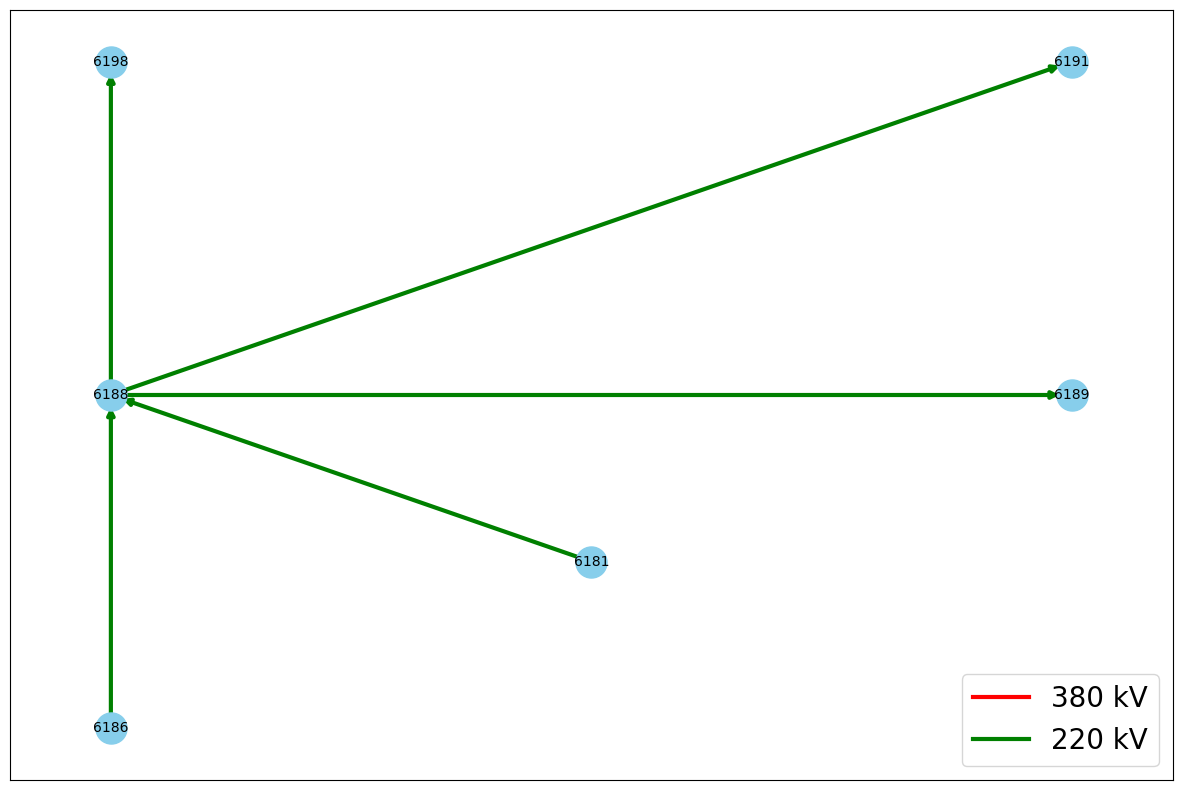

In [729]:
""" # Update positions based on optimized x and y coordinates
updated_pos = {node: (value(model.x_pos[node]), value(model.y_pos[node])) for node in G.nodes()}

# Plot the graph with updated positions
plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(G, updated_pos, node_color='skyblue', node_size=500)

# Draw the graph edges with different colors based on the voltage
for (u, v, d) in G.edges(data=True):
    edge_color = 'r' if d['voltage'] == 380.0 else 'g' if d['voltage'] == 220.0 else 'k'
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, width = 2)
    
    
    

#nx.draw(G, updated_pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', linewidths=1, font_size=15, arrows=True)
nx.draw_networkx_edge_labels(G, updated_pos, edge_labels=edge_labels, label_pos=0.5, font_size=7)
plt.title("Graph with Optimized Node Positions")
plt.show() """

""" # Update positions based on optimized x and y coordinates
updated_pos = {node: (value(model.x_pos[node]), value(model.y_pos[node])) for node in G.nodes()}

# Plot the graph with updated positions
plt.figure(figsize=(12, 8))
nx.draw(G, updated_pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', linewidths=1, font_size=15, arrows=True)
nx.draw_networkx_edge_labels(G, updated_pos, edge_labels=edge_labels, label_pos=0.5, font_size=10)
plt.title("Graph with Optimized Node Positions")
plt.show()
 """

import matplotlib.pyplot as plt
import matplotlib.lines as mlines


# First, ensure that you have defined 'value' function to extract values from the model
# Assuming value function is like this:
# def value(model_attribute):
#     return model_attribute()  # Adjust depending on how your model returns values

# Update positions based on optimized x and y coordinates
updated_pos = {node: (value(model.x_pos[node]), value(model.y_pos[node])) for node in G.nodes()}

# Increase the figure size
plt.figure(figsize=(15, 10))

# Draw nodes with updated positions
nx.draw_networkx_nodes(G, updated_pos, node_color='skyblue', node_size=500)


# Create custom lines for the legend
red_line = mlines.Line2D([], [], color='red', markersize=20, label='380 kV', linewidth = 3)
green_line = mlines.Line2D([], [], color='green', markersize=20, label='220 kV', linewidth = 3)




# Draw the graph edges with different colors based on the voltage using updated positions
for (u, v, d) in G.edges(data=True):
    edge_color = 'r' if d['voltage'] == 380.0 else 'g' if d['voltage'] == 220.0 else 'k'
    nx.draw_networkx_edges(G, updated_pos, edgelist=[(u, v)], edge_color=edge_color, width=3)

# Draw the node labels with updated positions
nx.draw_networkx_labels(G, updated_pos, font_size=10)

# Get the edge labels for the link_ids
edge_labels = nx.get_edge_attributes(G, 'link_id')

# Draw the edge labels with updated positions
nx.draw_networkx_edge_labels(G, updated_pos, edge_labels=edge_labels, label_pos=0.5, font_size=7)

# Optionally, if you want to make the plot title and axes invisible
#plt.title("Optimized Graph")
plt.axis('on')  # Turn off the axis

# Add the legend to the plot
plt.legend(handles=[red_line, green_line], loc='lower right', fontsize = 20)


# Show the plot with the optimized graph
plt.show()


